In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DMV/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Null values checking**

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **Duplicate Value checking**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **Drop columns which are not required**

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5029,Female,0,Yes,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.30,355.1,No
5840,Female,0,Yes,Yes,61,Yes,No,DSL,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),49.70,2961.4,No
723,Male,0,No,No,3,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.35,141.5,Yes
2736,Female,1,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.45,5294.6,No
2773,Male,0,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,29.10,688,No


## **Converting data types**

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## **Cheking relation between monthlycharges and total charges**

In [ ]:
def scatterPlot(x, y):
  sns.scatterplot(x= x, y= y)

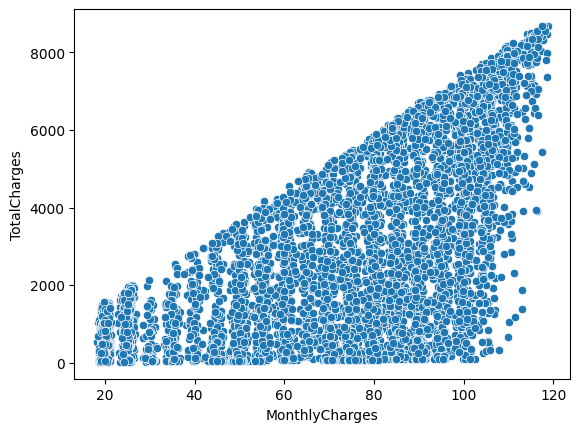

In [ ]:
scatterPlot(df['MonthlyCharges'], df['TotalCharges'])

<ipython-input-92-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

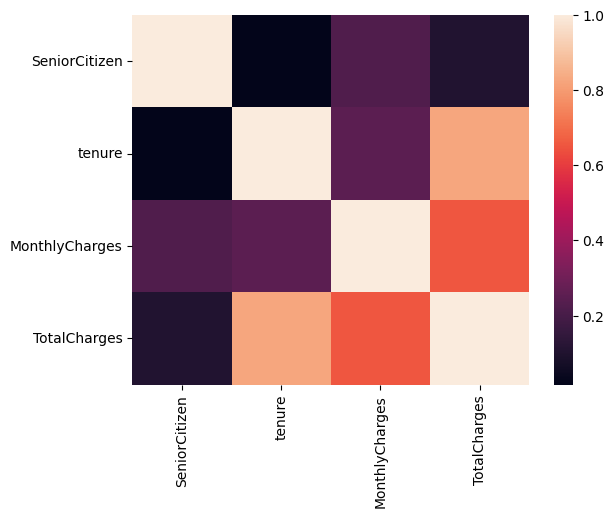

In [ ]:
sns.heatmap(df.corr())

In [ ]:
def histoGram(df):
  plotNo = 1;
  plt.figure(figsize=(20, 50))
  for column in df.columns:
    plt.subplot(int(df.shape[1]/2)+1, 4, plotNo)
    if df[column].dtype == "O":
      sns.histplot(df[column])
      plotNo += 1

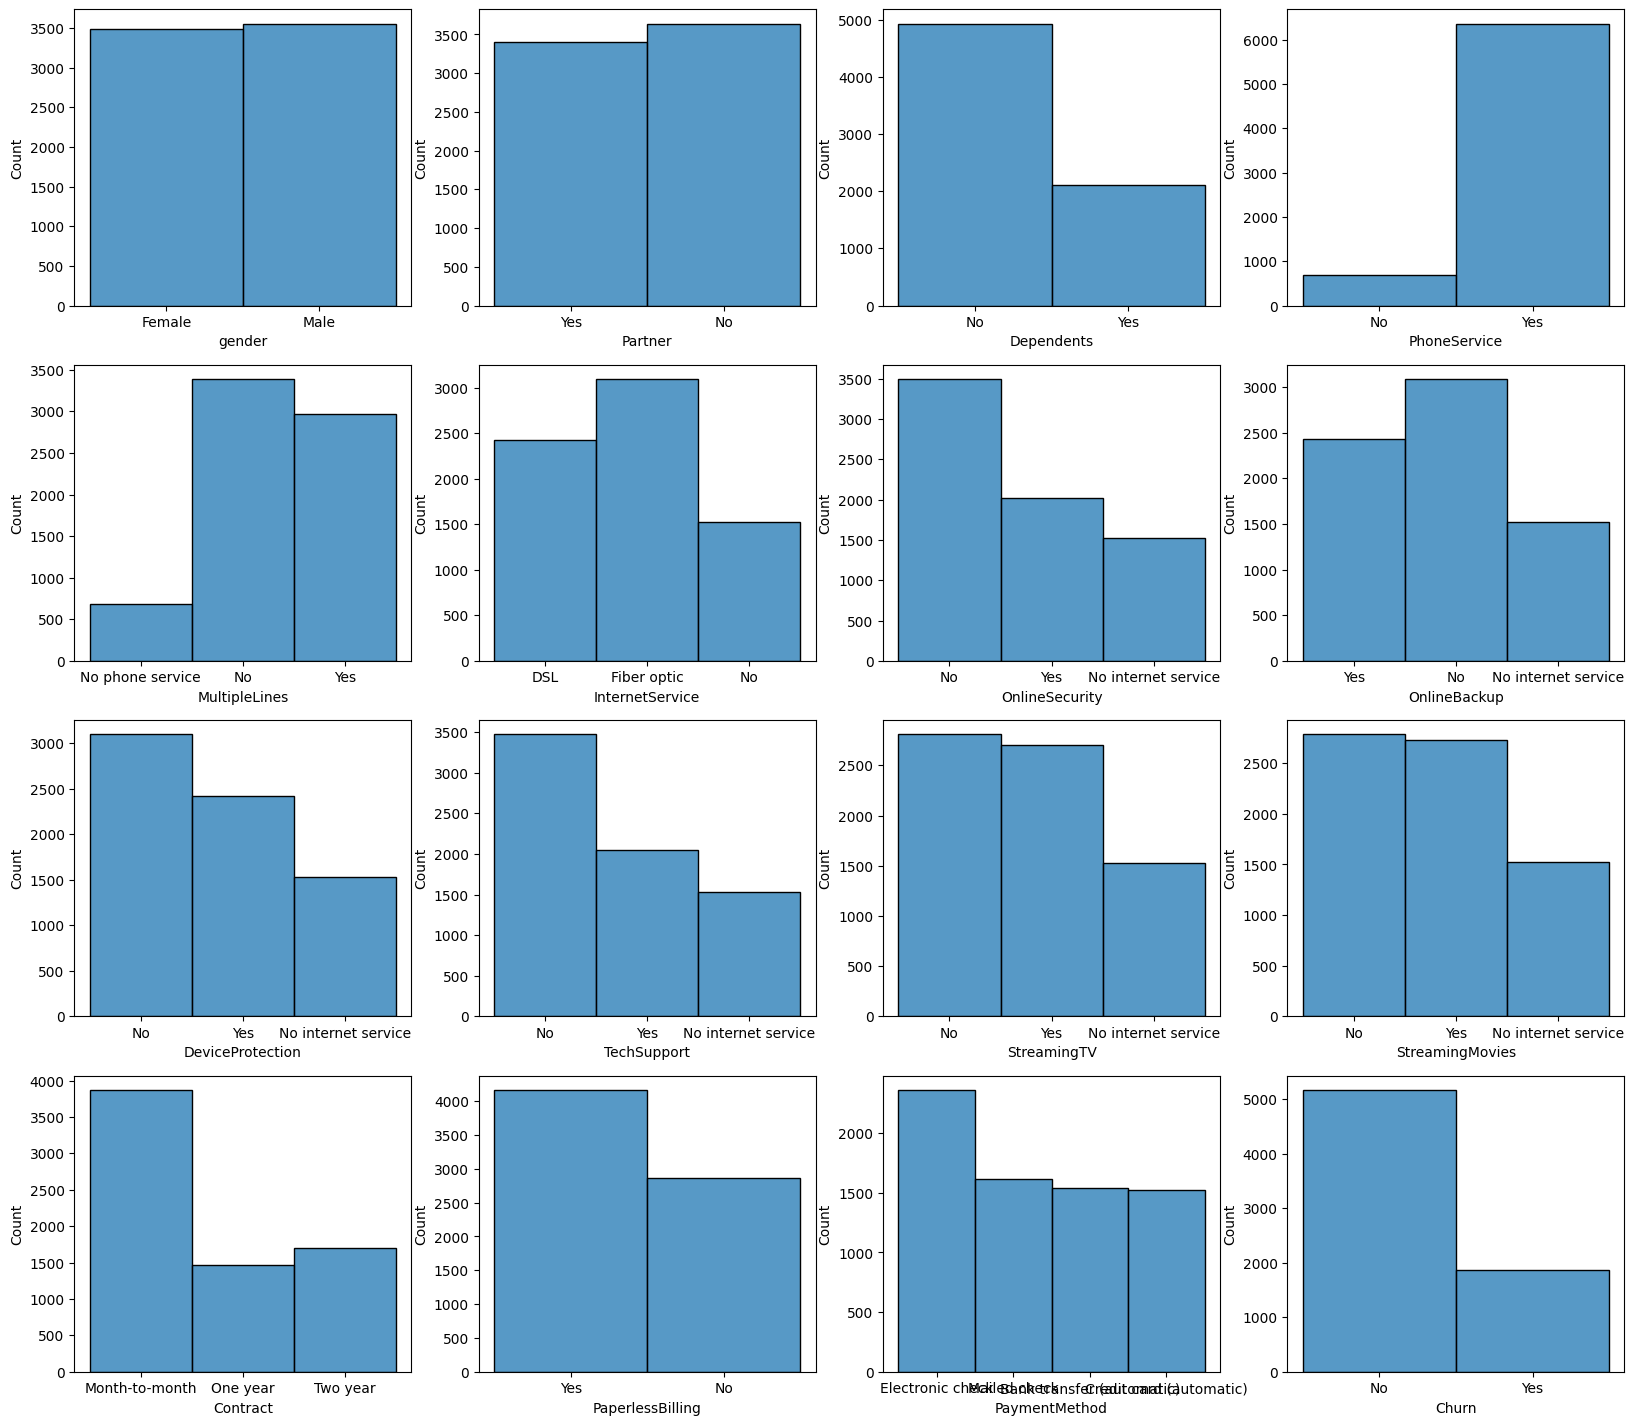

In [ ]:
histoGram(df)

## **Encoding Labeled Data to Numberical format**

In [ ]:
df["gender"].dtype

dtype('O')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['tenure'].dtype == "O"

False

In [ ]:
def encodeData(df):
  for column in df.columns:
    if df[column].dtype == 'O':
      print(f"----------------------------------------------------------Unique columns Present in {column}-------------------------------------")
      print(df[column].unique())
      print()
      print()
      print(f"-----------------------------------------*********************************---------------------------------------------------------")
      lr = LabelEncoder()
      df[column] = lr.fit_transform(df[column])

In [ ]:
encodeData(df)

----------------------------------------------------------Unique columns Present in gender-------------------------------------
['Female' 'Male']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in Partner-------------------------------------
['Yes' 'No']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in Dependents-------------------------------------
['No' 'Yes']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in PhoneService-------------------------------------
['No' 'Yes']


----------------

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## **Check Outliers**

In [ ]:
df.shape

(7043, 20)

In [ ]:
def boxPlot(df):
  plt.figure(figsize=(17, 50))
  i = 1
  for column in df.columns:
    plt.subplot(int(df.shape[1]/2)+1, 4, i)
    sns.boxplot(df[column])
    i+=1

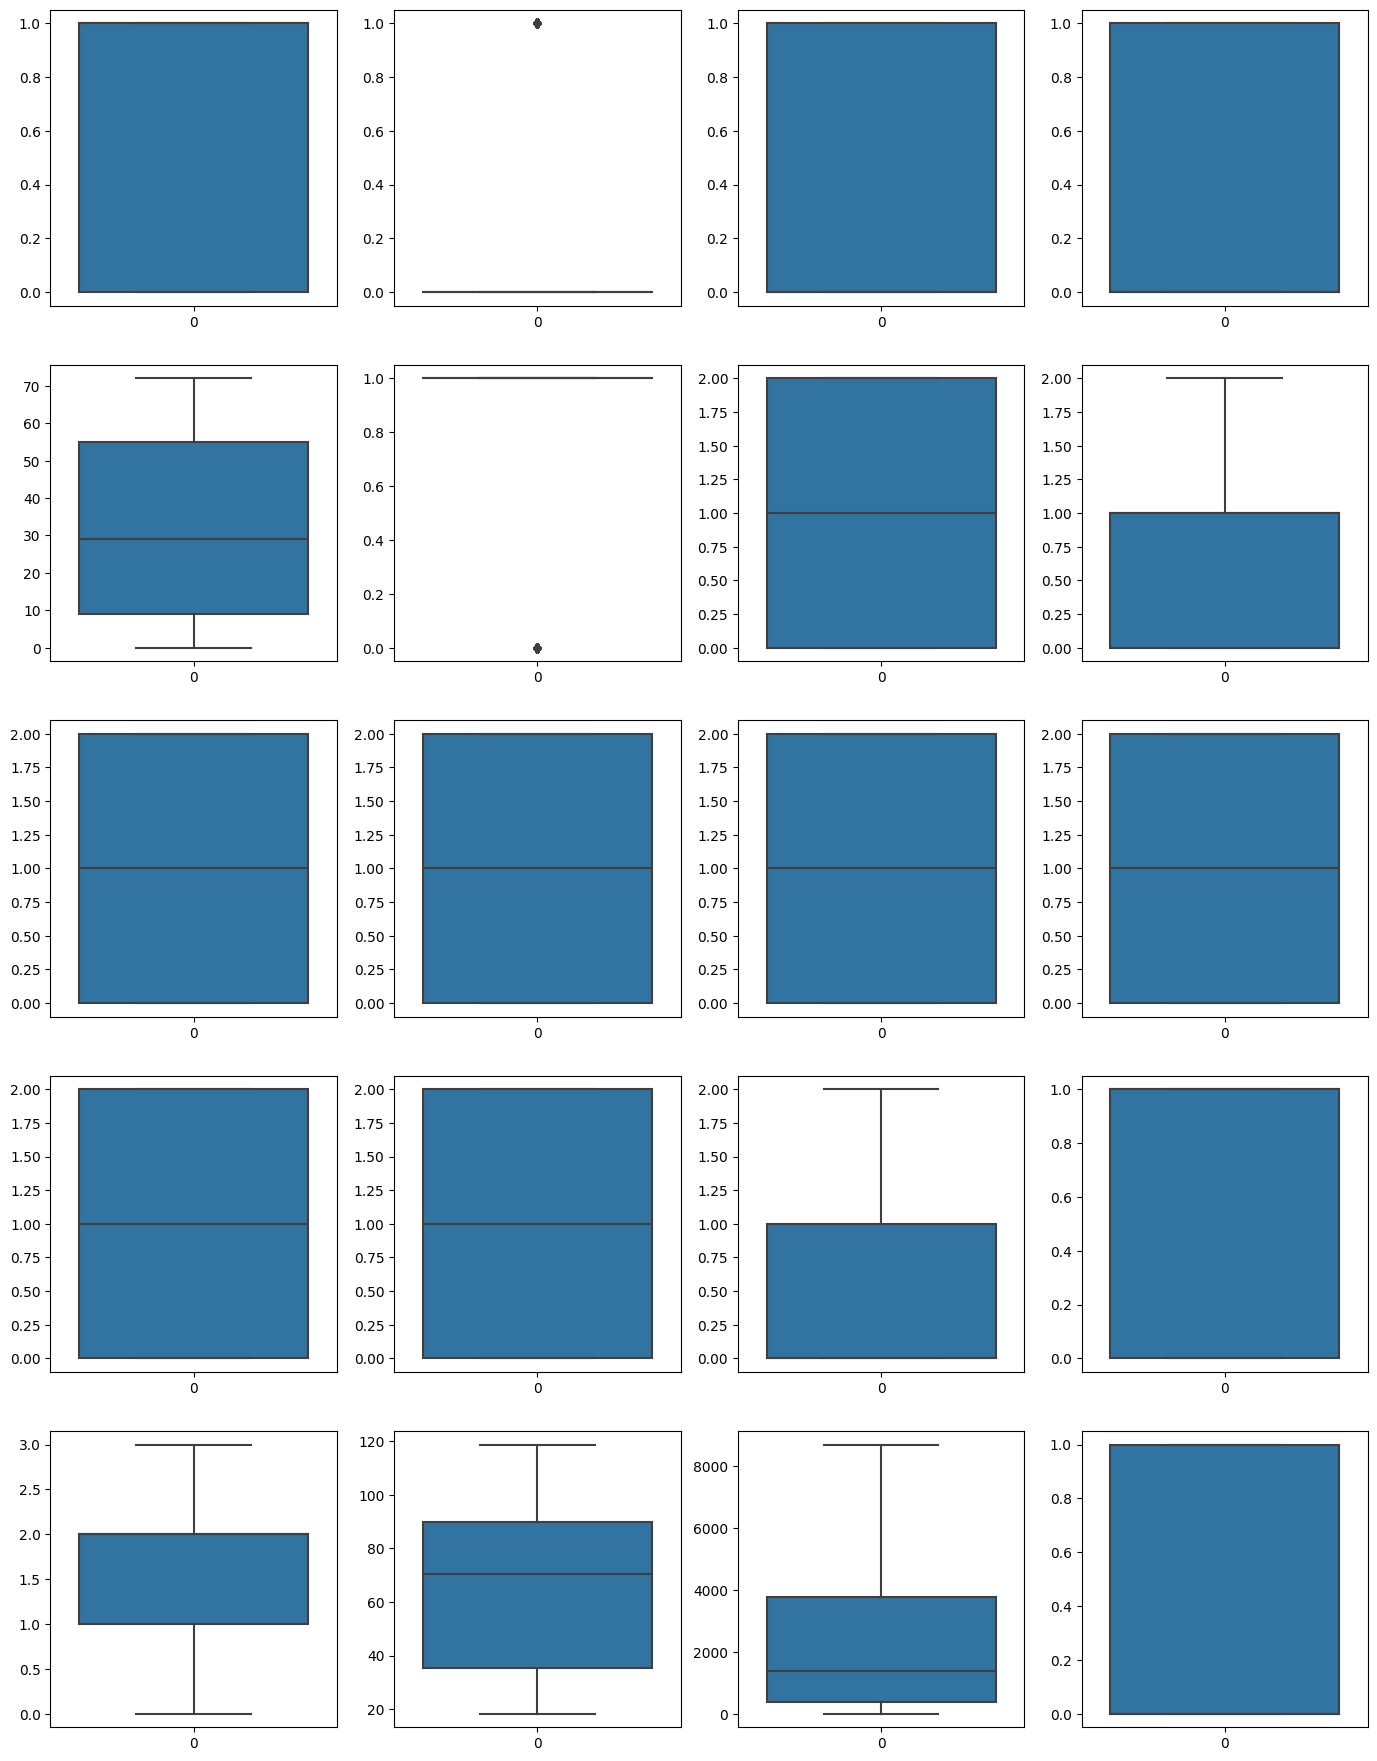

In [ ]:
boxPlot(df)

**As in above boxs plots there is no any ouliers are seen so above data does not have any outliers**

## **Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
scaledData =sc.fit_transform([df['MonthlyCharges'], df["TotalCharges"]])

In [ ]:
scaledData

array([[ 0., -1., -1., ..., -1., -1., -1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]])

## **Splitting Data into training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
x_train.shape

(5282, 19)

In [ ]:
x_test.shape

(1761, 19)

In [ ]:
y_test.shape

(1761,)

In [ ]:
y_train.shape

(5282,)

In [ ]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4751,1,0,0,0,11,1,2,2,1,1,1,1,1,1,0,0,1,23.15,245.20
3099,0,0,0,0,17,1,0,2,1,1,1,1,1,1,1,0,3,20.15,353.65
5188,1,1,1,0,30,1,2,1,0,0,0,2,2,2,0,1,2,101.50,2917.65
7005,1,0,1,0,23,1,0,2,1,1,1,1,1,1,1,0,1,19.30,486.20
6820,0,0,1,0,59,1,2,1,0,0,2,2,2,0,0,0,2,93.35,5386.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,1,0,0,0,23,1,0,2,1,1,1,1,1,1,1,0,0,20.15,405.60
4745,0,0,1,0,34,1,2,1,0,0,2,0,2,2,0,1,2,100.45,3414.65
3647,1,1,0,0,8,1,0,1,0,0,0,0,0,0,0,1,2,69.70,572.85
700,1,0,1,1,66,1,2,0,0,0,2,0,2,0,2,1,0,63.30,4189.70


In [ ]:
y_train

4751    1
3099    0
5188    0
7005    0
6820    0
       ..
4192    0
4745    0
3647    0
700     0
6927    0
Name: Churn, Length: 5282, dtype: int64